# Property selling price prediction using multiple linear regression, October 2017
## Introduction
* This project is my first practical experience working with regression for quantitative predictions.
* Our datasets contain 79 explanatory variables describing attributes of homes in Ames, Iowa. We'll use the features in our training data to develop a mutliple regression model for predicting the selling price of a home in the test data.
* Datasets and explanation of variables can be found on Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import math
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression, SelectKBest
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Initial Observations

In [2]:
df_train = pd.read_csv('/Users/jordanbauer/Data Mining Learning/Personal Projects/Multiple Regression/real_estate_train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.shape

(1460, 81)

In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## First steps
First we'll look at relevant features, and then move to take care of missing data, outliers, or anything else that might influence our analysis. 
### Missing Data

In [6]:
# The NaN values in PoolQC, Fence, Alley, etc. are not missing values but instead indicate that the property 
# has no pool, fence, alley, and so on. We'll have to refactor those values before we proceed.

# PoolQC
# Alley
# Fence
# Misc
# GarageCond
# GarageQual
# GarageFinish
# GarageType
# FireplaceQu
# BsmtFinType2
# BsmtFinType1
# BsmtExposure
# BsmtCond
# BsmtQual

refactor_vars = ['PoolQC', 'Alley', 'Fence', 'MiscFeature', 'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
                 'FireplaceQu', 'BsmtFinType2', 'BsmtFinType1', 'BsmtExposure', 'BsmtCond', 'BsmtQual']

for var in refactor_vars:

    df_train[refactor_vars].fillna(value='N', axis=1, inplace=True)

/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [7]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
def show_missing(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    df = pd.concat([total, percent], axis=1, keys=['Count', '% of Missing Data'])
    df = df[df['Count'] > 0]
    return df

missing_1 = show_missing(df_train)
missing_1

# We do have some missing data, but rather than removing observations, we'll look to see if any of these variables
# with missing data will prove useful in our analysis. If they do, we'll need to make some changes.

,Count,% of Missing Data
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


## Feature Selection
We'll pick out our useful variables, and then take care of outliers that might affect those relationships.

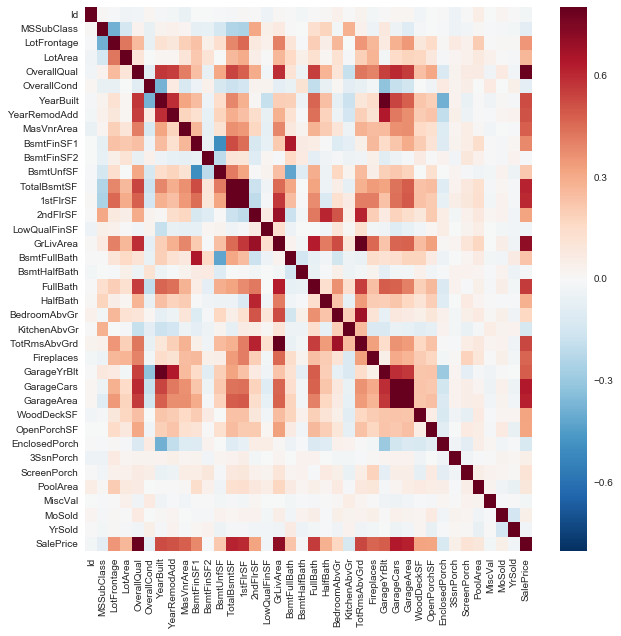

In [13]:
# A preliminary visualization

%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 10))
df_train_corr = df_train.corr()
sns.heatmap(df_train_corr, vmax=0.8)

In [14]:
# We'll take a look at the variables most highly correlated with SalePrice
# We'll choose the variables with an absolute correlation with SalePrice at or above 0.5

stack_cor = df_train_corr.stack()
stack_cor['SalePrice'].abs().sort_values(axis=0, ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
dtype: float

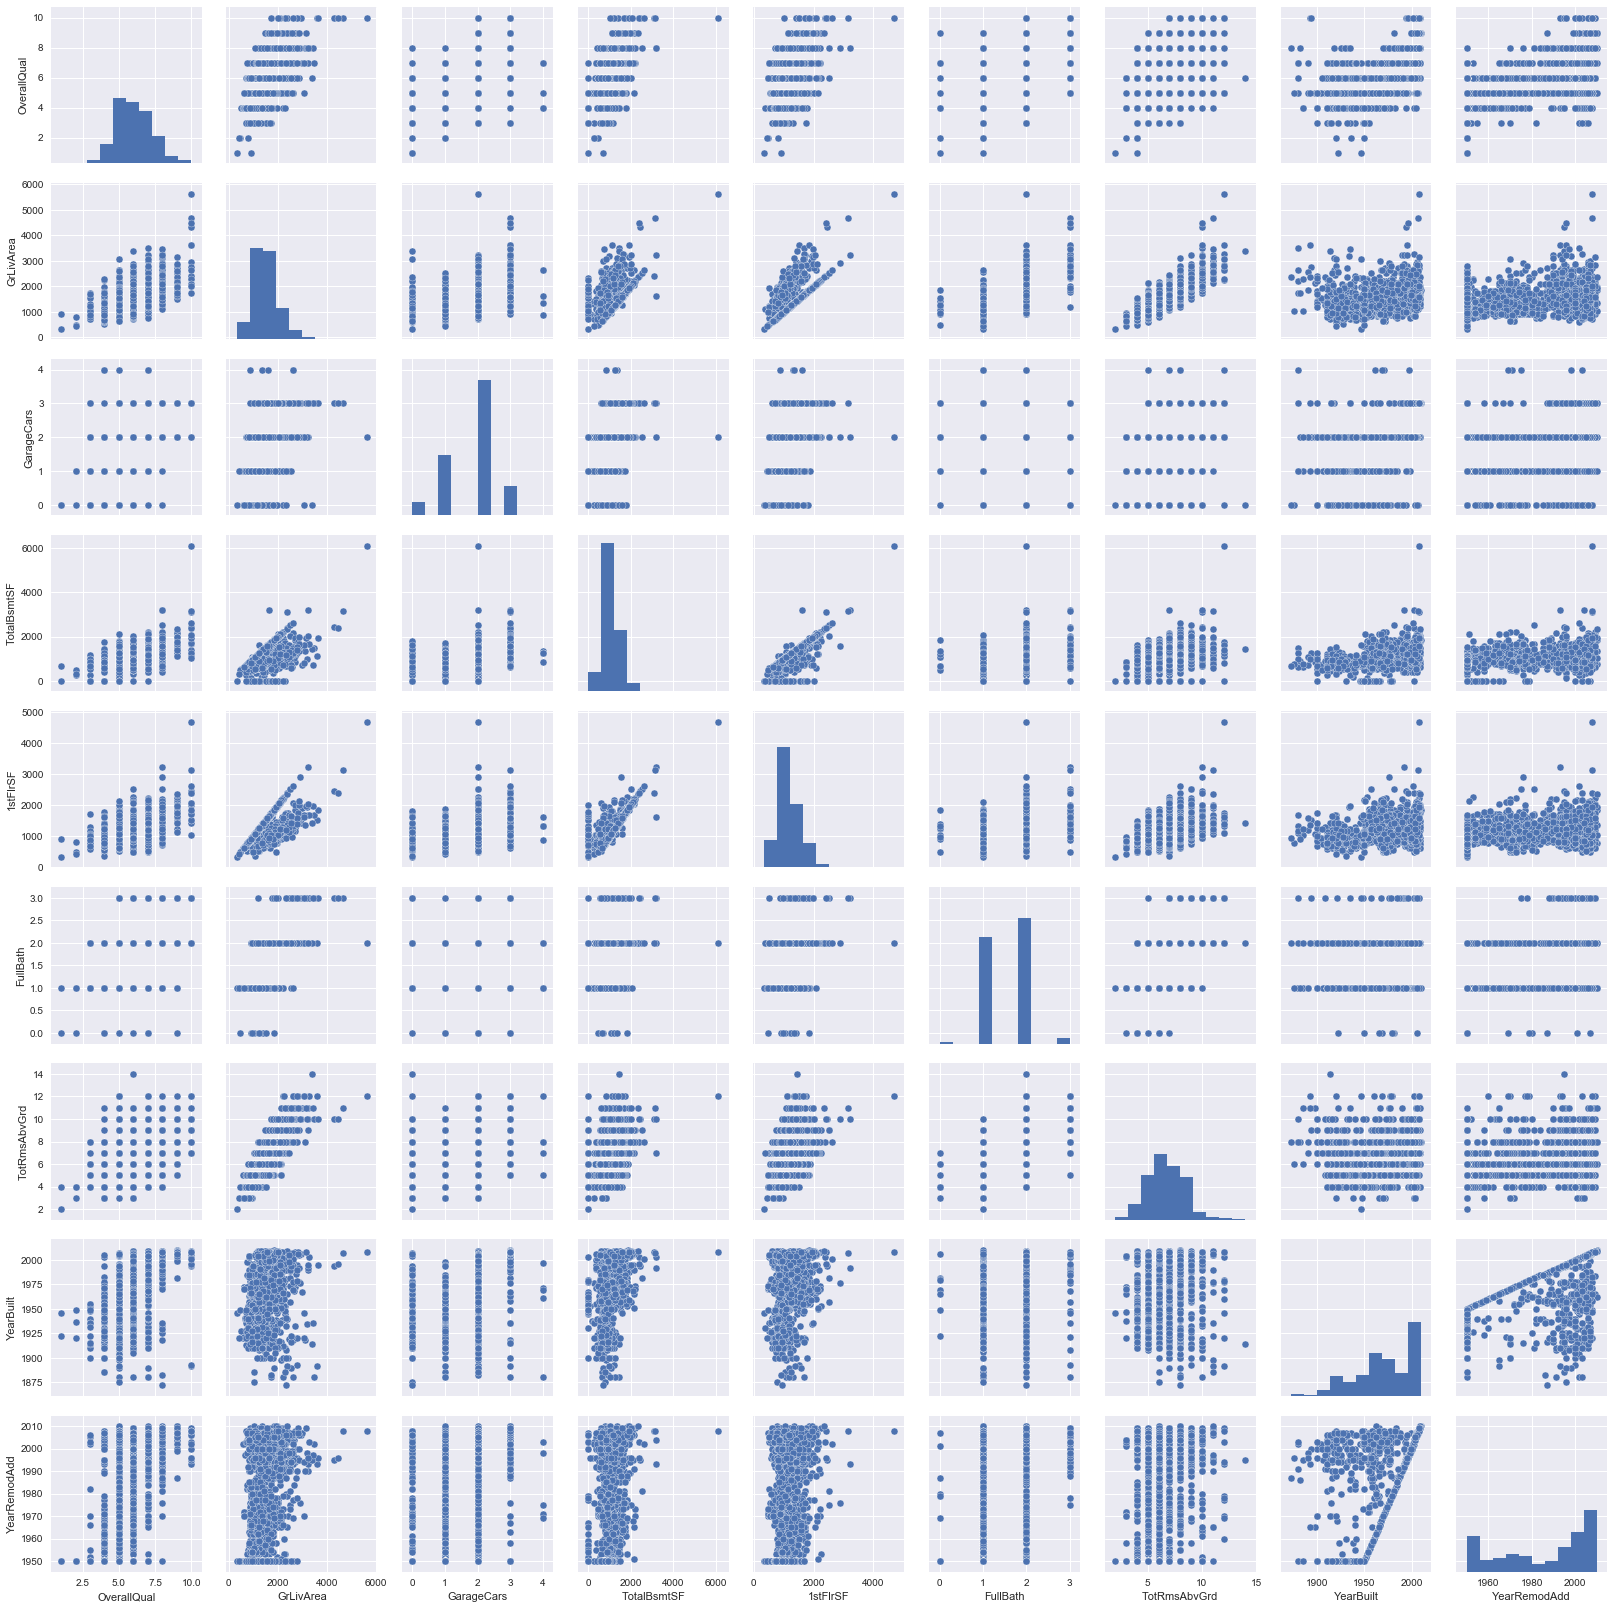

In [15]:
interest_vars = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 
        'YearBuilt', 'YearRemodAdd']
predictors = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 
        'YearBuilt', 'YearRemodAdd']
sns.pairplot(df_train[predictors])

## Outliers
Now that we have our meaningful variable to examine, let's take a look at outliers among the variables plotted against SalePrice. I'm hesitant to get too carried away with eliminating datapoints too avoid overfitting the model to the training data, so we'll only remove data points if it seems strictly necessary.

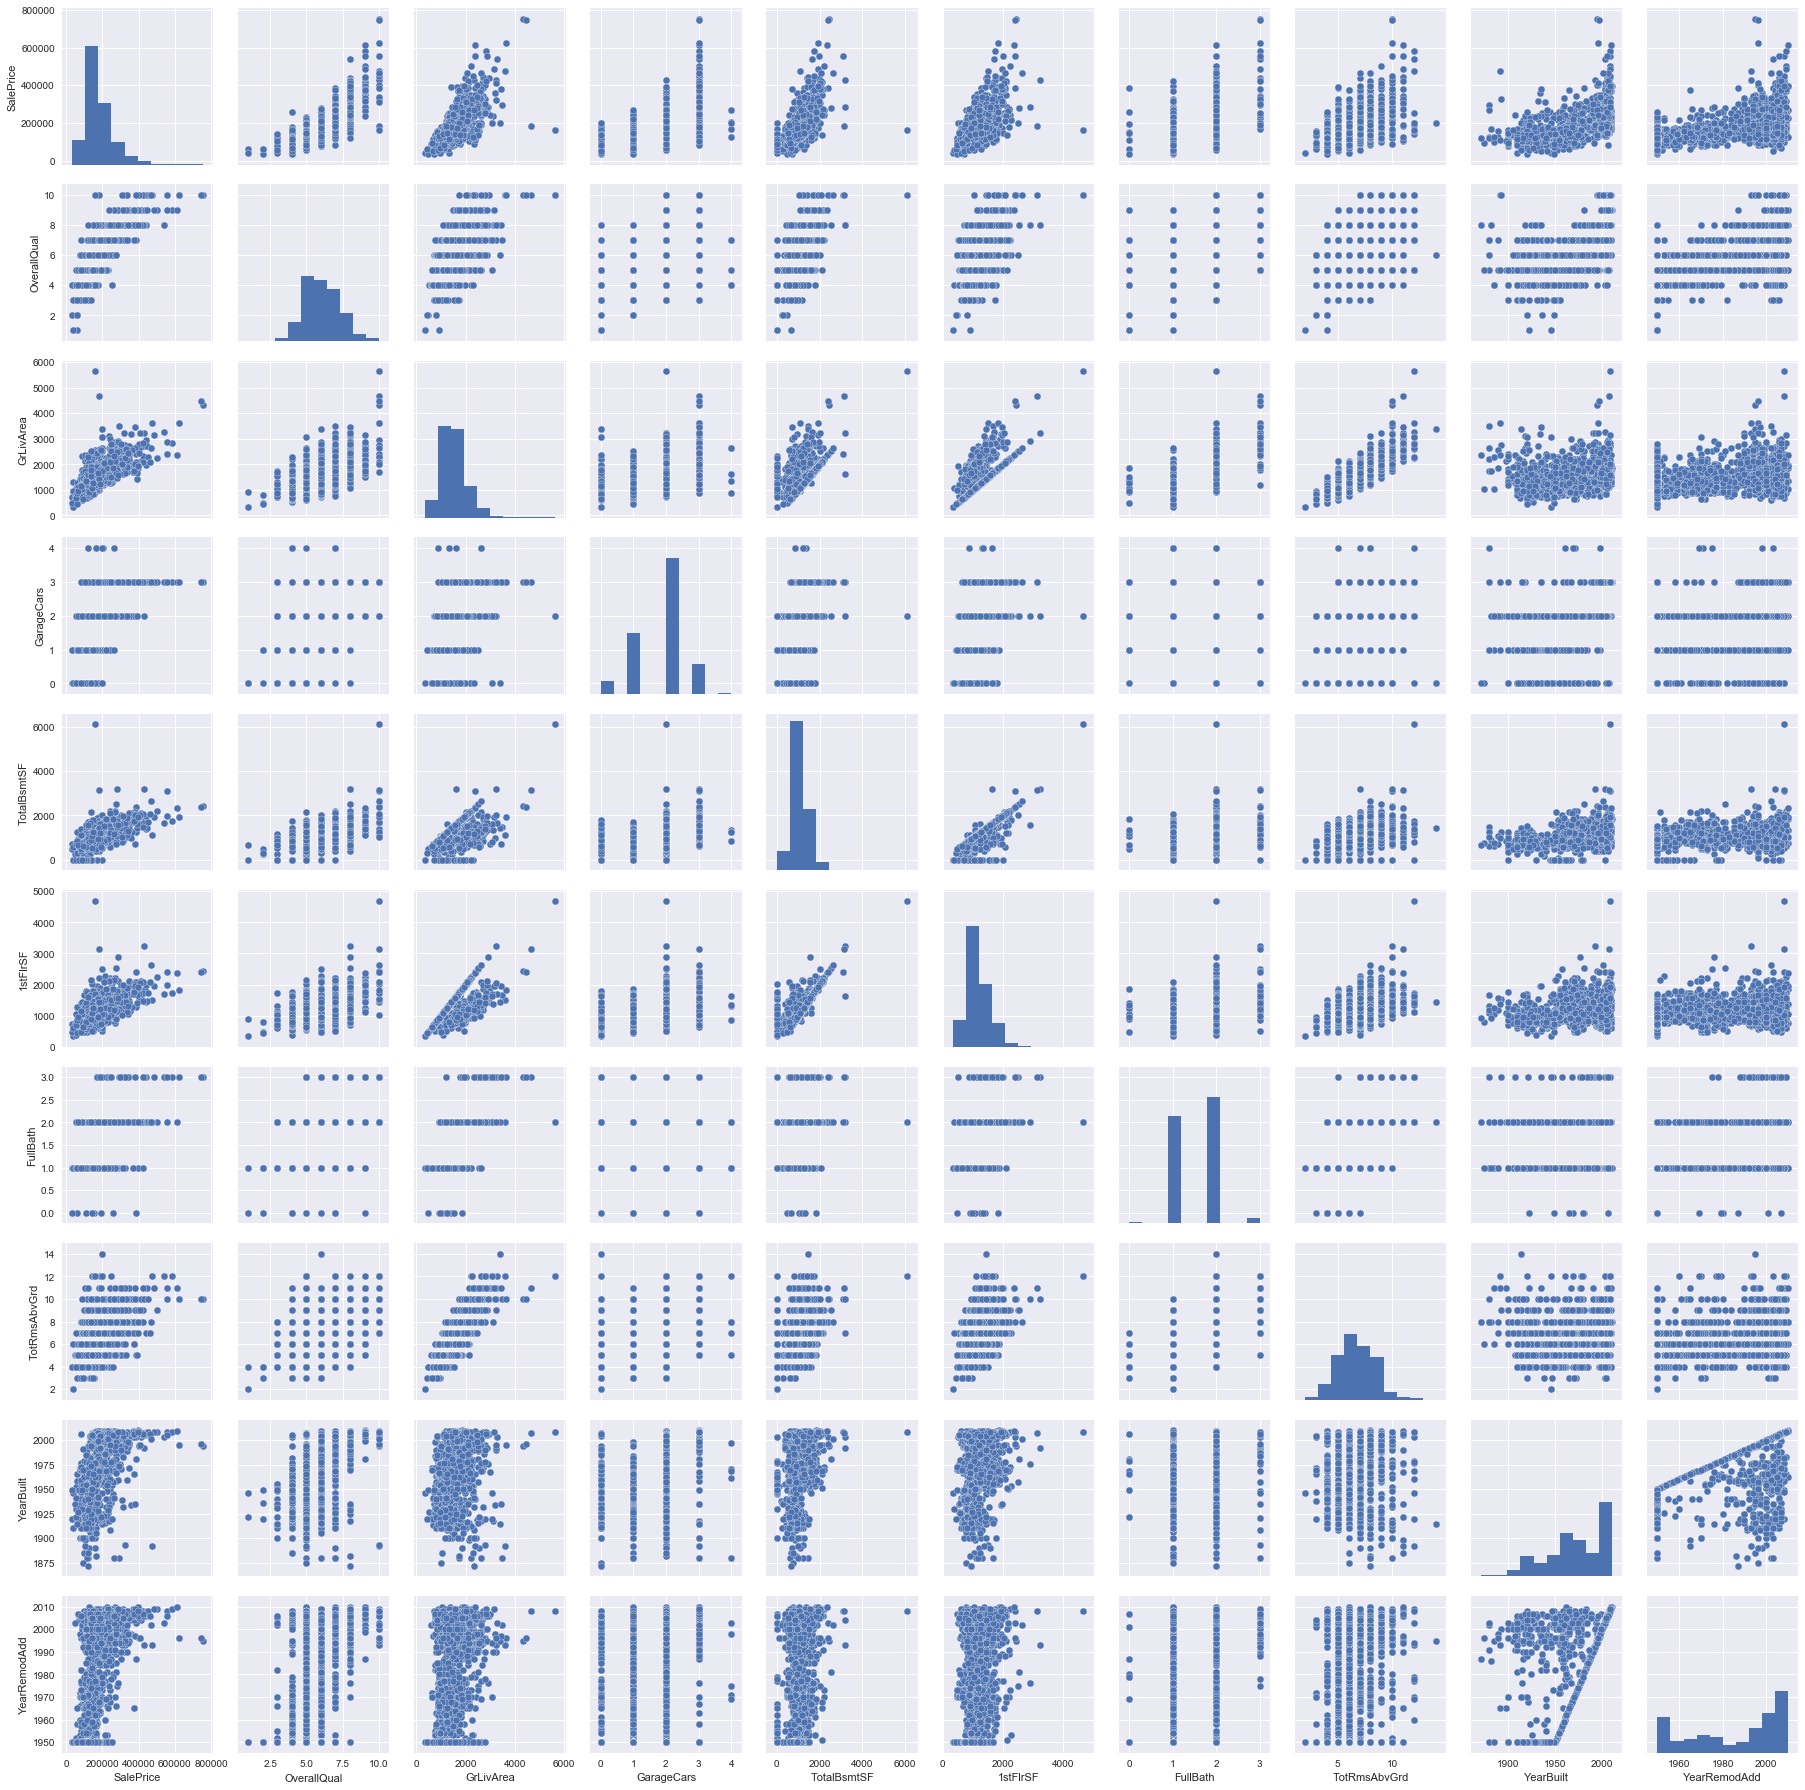

In [16]:
sns.pairplot(df_train[interest_vars])

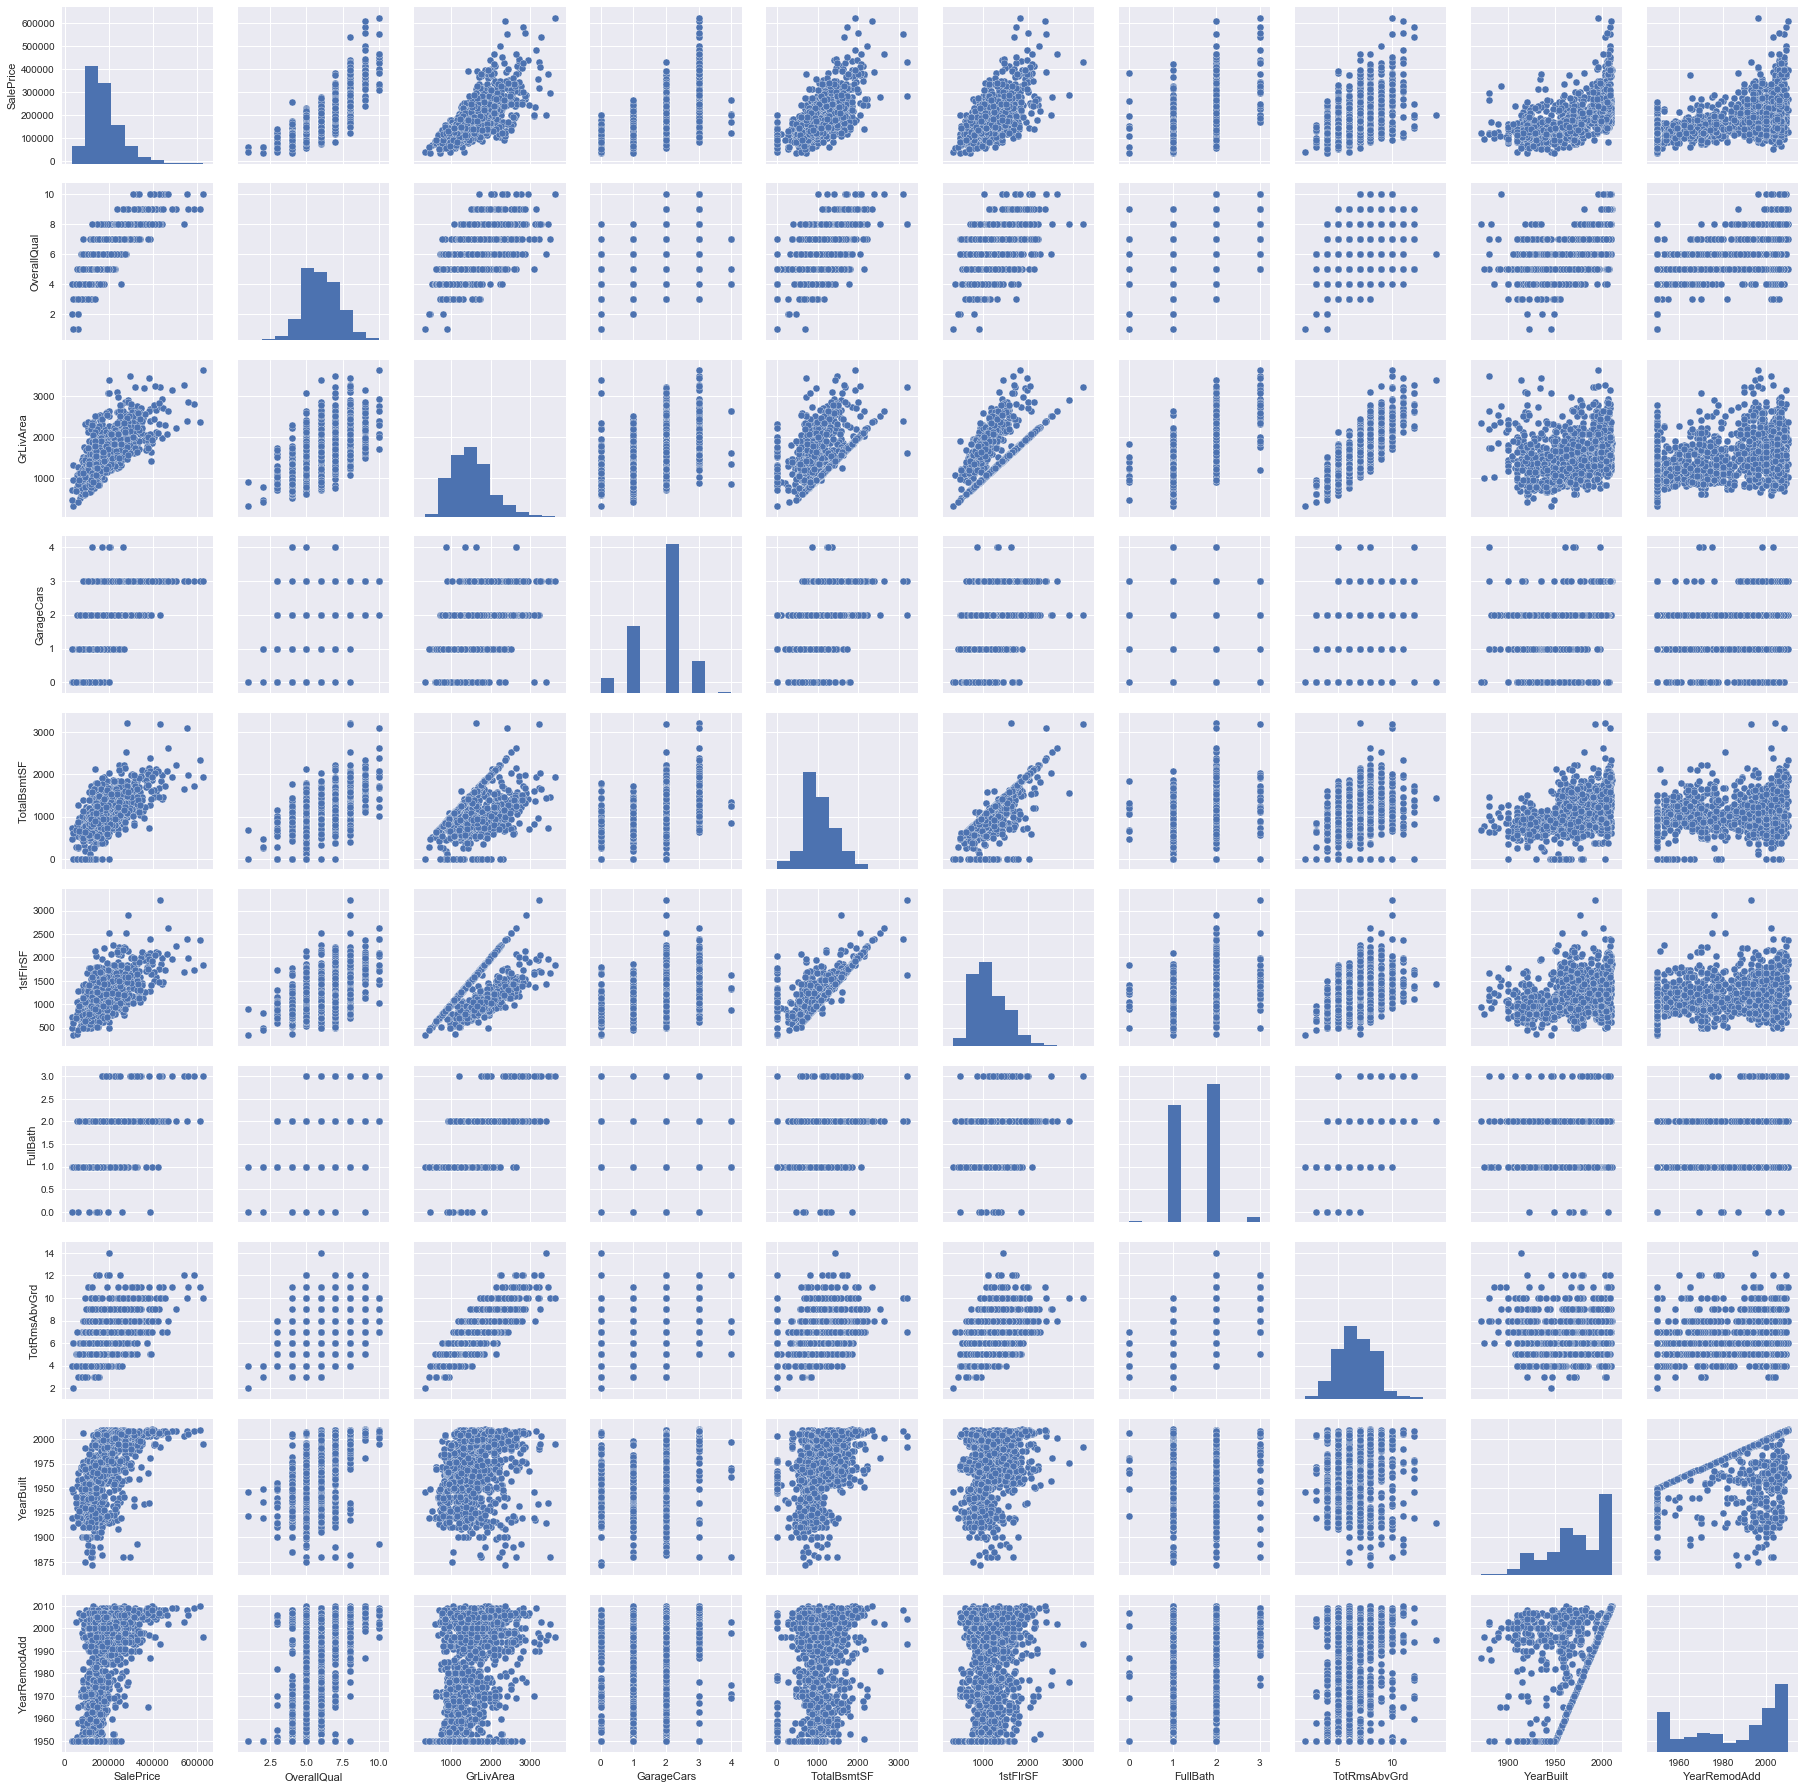

In [17]:
# We'll remove these data points and have another look at our pairplot

df_train = df_train[df_train.Id != 524]
df_train = df_train[df_train.Id != 1299] 
df_train = df_train[df_train.Id != 692] 
df_train = df_train[df_train.Id != 1183] 
df_train = df_train[df_train.Id != 186]
sns.pairplot(df_train[interest_vars])

In [18]:
# Predictor variable correlations with SalePrice and their p-values

def p_matrix(df, variables):
    new_df = pd.DataFrame(columns=variables, index=pd.MultiIndex.from_product([variables, ['R','P-Value']]))
    for w in variables:
        for z in variables:
                p = sp.stats.pearsonr(df[w], df[z])
                new_df.loc[(w, 'R'), z] = p[0]
                new_df.loc[(w, 'P-Value'), z] = p[1]
    return new_df

p_matrix(df_train, predictors)

OverallQual     GrLivArea    GarageCars   TotalBsmtSF  \
OverallQual  R                   1      0.580414      0.597728        0.5339   
             P-Value             0  8.77274e-132  1.18125e-141  5.29677e-108   
GrLivArea    R            0.580414             1      0.472601      0.396884   
             P-Value  8.77274e-132             0   7.82281e-82   4.37353e-56   
GarageCars   R            0.597728      0.472601             1      0.448877   
             P-Value  1.18125e-141   7.82281e-82             0   4.72107e-73   
TotalBsmtSF  R              0.5339      0.396884      0.448877             1   
             P-Value  5.29677e-108   4.37353e-56   4.72107e-73             0   
1stFlrSF     R             0.46157      0.523479      0.445315      0.800935   
             P-Value   1.15418e-77  3.61672e-103   8.57955e-72             0   
FullBath     R            0.543866      0.636904      0.464954      0.319775   
             P-Value  8.70817e-113   2.2896e-166   6.30019e-79   6.00581e-36   
TotRmsAbvGrd R            0.411941      0.832513      0.355946      0.259855   
             P-Value   1.07285e-60             0   1.05521e-44   6.97594e-24   
YearBuilt    R            0.579858      0.201994      0.541526      0.401065   
             P-Value  1.77799e-131   7.32983e-15  1.19673e-111   2.42268e-57   
YearRemodAdd R            0.551772      0.289917       0.41954      0.294847   
             P-Value  1.06868e-116   1.42726e-29   4.09618e-63   1.42133e-30   

                          1stFlrSF      FullBath  TotRmsAbvGrd     YearBuilt  \
OverallQual  R             0.46157      0.543866      0.411941      0.579858   
             P-Value   1.15418e-77  8.70817e-113   1.07285e-60  1.77799e-131   
GrLivArea    R            0.523479      0.636904      0.832513      0.201994   
             P-Value  3.61672e-103   2.2896e-166             0   7.32983e-15   
GarageCars   R            0.445315      0.464954      0.355946      0.541526   
             P-Value   8.57955e-72   6.30019e-79   1.05521e-44  1.19673e-111   
TotalBsmtSF  R            0.800935      0.319775      0.259855      0.401065   
             P-Value             0   6.00581e-36   6.97594e-24   2.42268e-57   
1stFlrSF     R                   1      0.374298      0.390037      0.282452   
             P-Value             0   1.32566e-49   4.56566e-54   4.30553e-28   
FullBath     R            0.374298             1      0.550072      0.469367   
             P-Value   1.32566e-49             0  7.55977e-116   1.35354e-80   
TotRmsAbvGrd R            0.390037      0.550072             1     0.0959636   
             P-Value   4.56566e-54  7.55977e-116             0   0.000246571   
YearBuilt    R            0.282452      0.469367     0.0959636             1   
             P-Value   4.30553e-28   1.35354e-80   0.000246571             0   
YearRemodAdd R            0.238129      0.438114      0.187352      0.594058   
             P-Value   3.31382e-20   2.71828e-69   5.83982e-13  1.63857e-139   

                      YearRemodAdd  
OverallQual  R            0.551772  
             P-Value  1.06868e-116  
GrLivArea    R            0.289917  
             P-Value   1.42726e-29  
GarageCars   R             0.41954  
             P-Value   4.09618e-63  
TotalBsmtSF  R            0.294847  
             P-Value   1.42133e-30  
1stFlrSF     R            0.238129  
             P-Value   3.31382e-20  
FullBath     R            0.438114  
             P-Value   2.71828e-69  
TotRmsAbvGrd R            0.187352  
             P-Value   5.83982e-13  
YearBuilt    R            0.594058  
             P-Value  1.63857e-139  
YearRemodAdd R                   1  
             P-Value             0

In [19]:
# This looks to be about what I expected, all our variables look good

selector = SelectKBest(f_regression, k='all')
selector.fit(df_train[predictors], df_train['SalePrice'])
selector_scores = pd.DataFrame(data={'F-Score': selector.scores_, 'P-Value': selector.pvalues_}, index=predictors)
selector_scores

,F-Score,P-Value
OverallQual,2576.239802,4.940656e-324
GrLivArea,1540.730401,2.410715e-230
GarageCars,1056.206076,1.352202e-174
TotalBsmtSF,1060.397121,4.017823e-175
1stFlrSF,936.538557,3.668443e-159
FullBath,663.524916,7.808070e-121
TotRmsAbvGrd,577.461738,1.026502e-107
YearBuilt,618.049607,5.704094e-114
YearRemodAdd,547.292620,5.532202e-103


## Independent Variable Assumptions
### Mulitcollinearity
To build our model we'll have to remove independent variables that are correlated with one another as well as with the dependent variable.

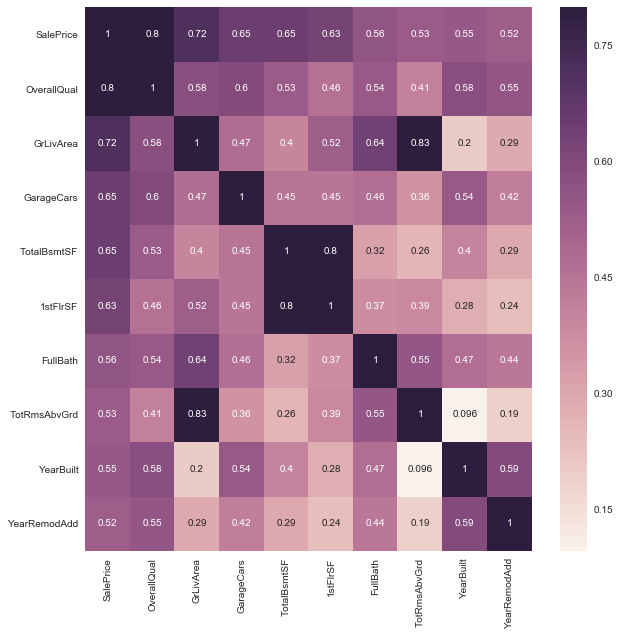

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
corr_sub_matrix = df_train[interest_vars].corr()
sns.heatmap(corr_sub_matrix, annot=True, vmax=0.8)

We can see that 1stFlrSF and TotalBsmtSF are very highly correlated, as are TotRmsAbvGrd and GrLivArea. We'll look at the variance inflation factor for each of these variables to see if correlation isn't showing the whole picture.

In [21]:
def vif_matrix(df, variables):
    new_df = pd.DataFrame(columns=variables, index=variables)
    for w in variables:
        for z in variables:
                vif = [sp.stats.outliers_influence.variance_inflation_factor(df[w], i) for i in range(df.shape[1])]
                new_df.loc[w, z] = vif
    return new_df

vif_matrix

<function __main__.vif_matrix>

In [22]:
# We'll remove 1stFlrSF and TotRmsAbvGrd, as TotalBsmtSF and GrLivArea, resepctfully, have greater 
# correlations with SalePrice

predictors.remove('1stFlrSF')
interest_vars.remove('1stFlrSF')
predictors.remove('TotRmsAbvGrd')
interest_vars.remove('TotRmsAbvGrd')

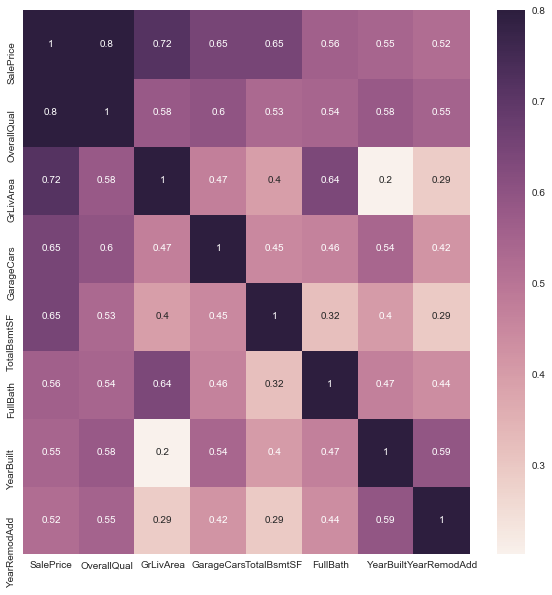

In [23]:
# And we'll look at our correlation heat map one more time with the remaining predictor variables
# GrLivArea does have a considerable correlation with FullBath, but I don't feel the correlation is strong enough
# to merit removing one of those variables

fig, ax = plt.subplots(figsize=(10,10))
corr_sub_matrix = df_train[interest_vars].corr()
sns.heatmap(corr_sub_matrix, annot=True, vmax=0.8)

### Refactors for YearBuilt and YearRemodAdd
Before we continue, we should make adjustments to the variables with year data. Years are categorical, and when we created dummy variables, we might end up having dozens of different variables as years; some years may be represented in our training data and unrepresented in our test data. To avoid this hang up, we'll bin the years into decades.
* 0 = 1889 and older
* 1 = 1890 - 1899
* 2 = 1900 - 1909
* 3 = 1910 - 1919
* 4 = 1920 - 1929
* 5 = 1930 - 1939
* 6 = 1940 - 1949
* 7 = 1950 - 1959
* 8 = 1960 - 1969
* 9 = 1970 - 1979
* 10 = 1980 - 1989
* 11 = 1990 - 1999
* 12 = 2000 - 2009
* 13 = 2010+

In [24]:
for var in ['YearBuilt', 'YearRemodAdd']:
    df_train.loc[df_train[var] <= 1889, var] = 0
    df_train.loc[(df_train[var] >= 1890) & (df_train[var] < 1900), var] = 1
    df_train.loc[(df_train[var] >= 1900) & (df_train[var] < 1910), var] = 2
    df_train.loc[(df_train[var] >= 1910) & (df_train[var] < 1920), var] = 3
    df_train.loc[(df_train[var] >= 1920) & (df_train[var] < 1930), var] = 4
    df_train.loc[(df_train[var] >= 1930) & (df_train[var] < 1940), var] = 5
    df_train.loc[(df_train[var] >= 1940) & (df_train[var] < 1950), var] = 6
    df_train.loc[(df_train[var] >= 1950) & (df_train[var] < 1960), var] = 7
    df_train.loc[(df_train[var] >= 1960) & (df_train[var] < 1970), var] = 8
    df_train.loc[(df_train[var] >= 1970) & (df_train[var] < 1980), var] = 9
    df_train.loc[(df_train[var] >= 1980) & (df_train[var] < 1990), var] = 10
    df_train.loc[(df_train[var] >= 1990) & (df_train[var] < 2000), var] = 11
    df_train.loc[(df_train[var] >= 2000) & (df_train[var] < 2010), var] = 12
    df_train.loc[(df_train[var] >= 2010), var] = 13

In [25]:
qual_predictors = ['OverallQual', 'GarageCars', 'FullBath', 'YearBuilt', 'YearRemodAdd']

### Normality
We'll examine our continuous variables' distributions for normality, starting with our dependent variable.
#### SalePrice

1.55787948859367

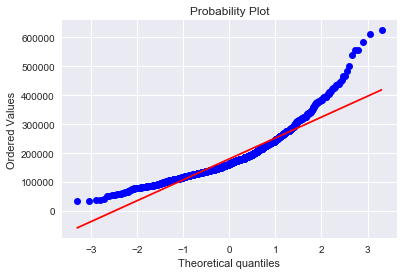

In [26]:
# Our dependent variable is looking skewed. We'll see if a log transformation can better approximated normality
sp.stats.probplot(df_train['SalePrice'], plot=plt)
df_train['SalePrice'].skew()

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


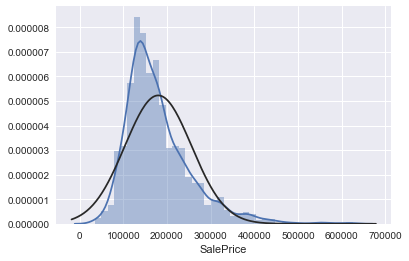

In [27]:
sns.distplot(df_train['SalePrice'], fit=sp.stats.norm)

0.058504387492830684

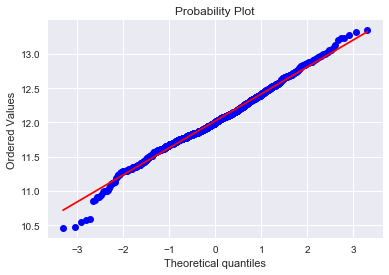

In [28]:
# Looking much better
df_train['SalePrice'] = np.log(df_train['SalePrice'])
sp.stats.probplot(df_train['SalePrice'], plot=plt)
df_train['SalePrice'].skew()

#### GrLivArea

0.80629639218820848

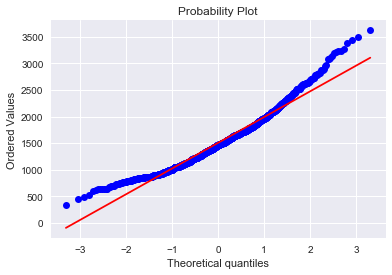

In [29]:
sp.stats.probplot(df_train['GrLivArea'], plot=plt)
df_train['GrLivArea'].skew()

In [30]:
df_train['GrLivArea'].kurt()
# What do we have here?

0.86679484020568909

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


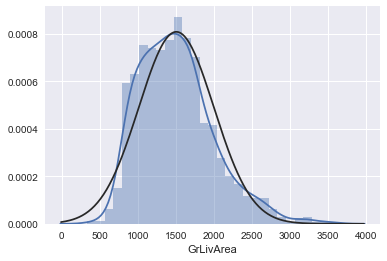

In [31]:
# It isn't bad, but it is weighted below the mean. We'll perform a log transformation and reassess
sns.distplot(df_train['GrLivArea'], fit=sp.stats.norm)

In [32]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

((array([-3.30417817, -3.04690148, -2.90382339, ...,  2.90382339,
          3.04690148,  3.30417817]),
  array([ 5.81114099,  6.08221891,  6.1737861 , ...,  8.14525957,
          8.15851624,  8.19616114])),
 (0.32704092634114812, 7.263845312125718, 0.99787420578672559))

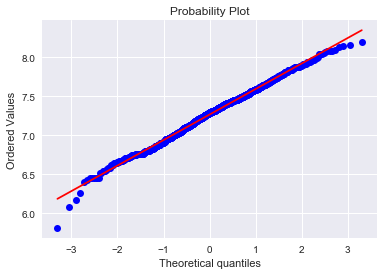

In [33]:
# This looks better

sp.stats.probplot(df_train['GrLivArea'], plot=plt)

#### TotalBsmtSF

((array([-3.30417817, -3.04690148, -2.90382339, ...,  2.90382339,
          3.04690148,  3.30417817]),
  array([   0,    0,    0, ..., 3094, 3200, 3206])),
 (405.83754123294068, 1050.6199312714778, 0.98270878590203037))

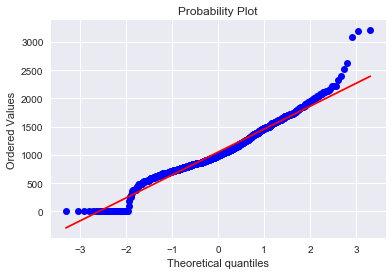

In [34]:
# Abother log transformation should remedy this curve, but there's a hangup that shows in the plot below
# We won't be able to perform a log transformation if there are 0 values in the basement square footage data
# I didn't feel it necessary to look for homes with 0 above ground living area for obvious reasons
# We'll have to set the existence of a basement as a condition

sp.stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [35]:
# Create a binary variable for having or not having a basement

df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0

# Where TotalBsmtSF is not 0, HasBsmt is 1

df_train.loc[df_train['TotalBsmtSF'] > 0, 'HasBsmt'] = 1

# And our log transformation

df_train.loc[df_train['HasBsmt'] == 1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


((array([-3.2969521 , -3.03915216, -2.89575098, ...,  2.89575098,
          3.03915216,  3.2969521 ]),
  array([ 4.65396035,  5.24702407,  5.5759491 , ...,  8.03722003,
          8.07090609,  8.07277933])),
 (0.35345940154723077, 6.921691209356843, 0.9909763079281747))

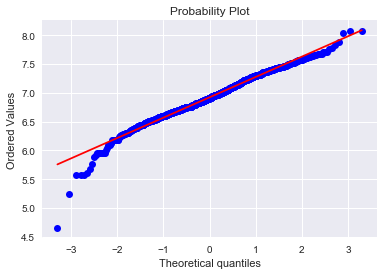

In [36]:
# Now that is a beautiful curve

sp.stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


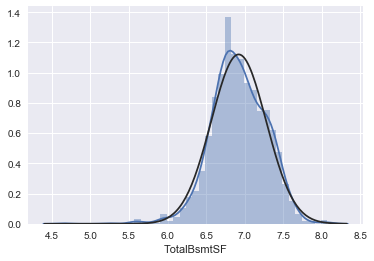

In [37]:
# And now we have a much more normal-looking distribution 

sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=sp.stats.norm)

### Homoscedasticity
Here we'll be looking to see if the errors of the dependent variable predicted with the independent variables remain constant. Variables displaying heteroscedasticity should have a conical or diamond shape to the spread.

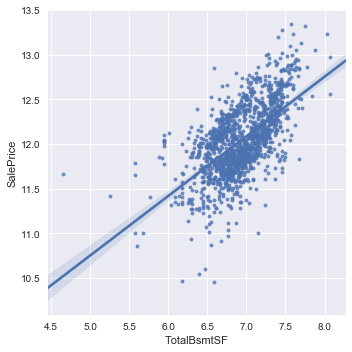

In [38]:
sns.lmplot('TotalBsmtSF', 'SalePrice', data=df_train[df_train['TotalBsmtSF'] > 0], scatter_kws={"s": 15})

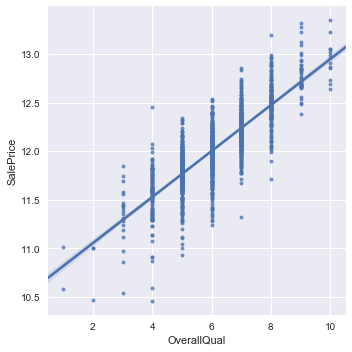

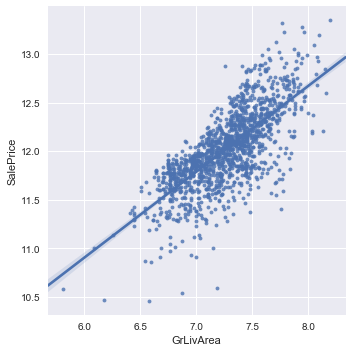

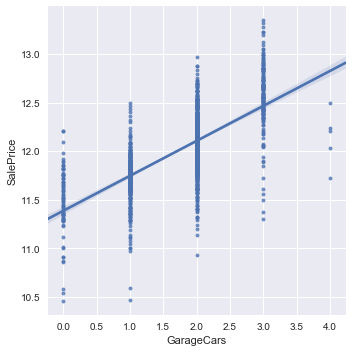

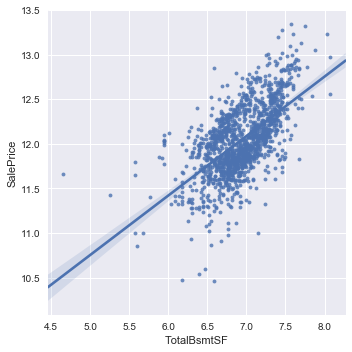

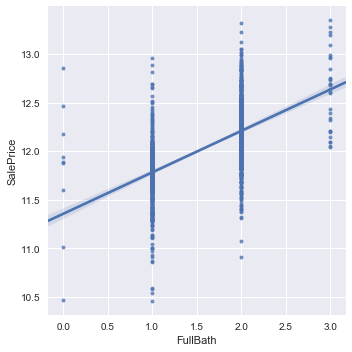

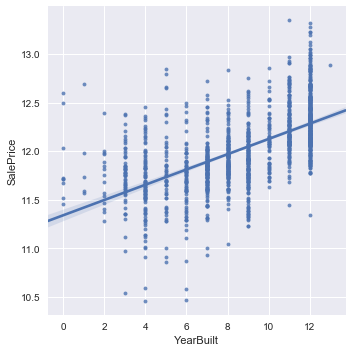

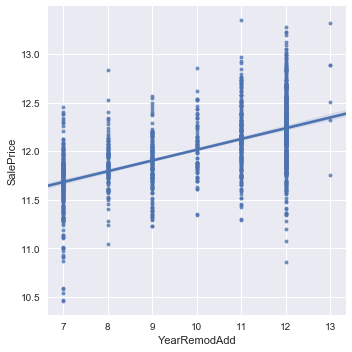

In [39]:
# The spread of each variable seems fairly consistently distributed above and below the regression line
# I'm not sure why Seaborn isn't drawing a regression line for the TotalBsmtSF plot, but I still feel good about the
# spread

for variable in predictors:
    if variable != 'TotalBsmtSF':
        sns.lmplot(variable, 'SalePrice', data=df_train, scatter_kws={"s": 15})
    else:
        sns.lmplot(variable, 'SalePrice', data=df_train[df_train['TotalBsmtSF'] > 0], scatter_kws={"s": 15})

## Dummy Variables

In [40]:
# Let's create dummy variables for our categorical variables

df_predict = df_train[predictors]
df_predict = pd.get_dummies(df_predict, columns=qual_predictors, drop_first=True)

In [41]:
# We have a small problem. Our training data must be missing some specific values of certain variables:
# OverallQual, for instance, is on a 1-10 scale, but we are missing observations with a #2 overall quality rating
# Because of this, our dummy variables may differ between our training and testing data

df_predict.columns

Index(['GrLivArea', 'TotalBsmtSF', 'OverallQual_2', 'OverallQual_3',
       'OverallQual_4', 'OverallQual_5', 'OverallQual_6', 'OverallQual_7',
       'OverallQual_8', 'OverallQual_9', 'OverallQual_10', 'GarageCars_1',
       'GarageCars_2', 'GarageCars_3', 'GarageCars_4', 'FullBath_1',
       'FullBath_2', 'FullBath_3', 'YearBuilt_1', 'YearBuilt_2', 'YearBuilt_3',
       'YearBuilt_4', 'YearBuilt_5', 'YearBuilt_6', 'YearBuilt_7',
       'YearBuilt_8', 'YearBuilt_9', 'YearBuilt_10', 'YearBuilt_11',
       'YearBuilt_12', 'YearBuilt_13', 'YearRemodAdd_8', 'YearRemodAdd_9',
       'YearRemodAdd_10', 'YearRemodAdd_11', 'YearRemodAdd_12',
       'YearRemodAdd_13'],
      dtype='object')

## Testing Data
Our predictors are chosen and vetted, so let's start working with our testing data.

In [42]:
# Let's bring in our test data and narrow it down to our predictor variables

df_test = pd.read_csv('/Users/jordanbauer/Data Mining Learning/Personal Projects/Multiple Regression/real_estate_test.csv')
df_test = df_test[predictors]
df_test.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath',
       'YearBuilt', 'YearRemodAdd'],
      dtype='object')

In [43]:
# We'll have to refactor our yearly variables just as we did in the training data

for var in ['YearBuilt', 'YearRemodAdd']:
    df_test.loc[df_test[var] <= 1889, var] = 0
    df_test.loc[(df_test[var] >= 1890) & (df_test[var] < 1900), var] = 1
    df_test.loc[(df_test[var] >= 1900) & (df_test[var] < 1910), var] = 2
    df_test.loc[(df_test[var] >= 1910) & (df_test[var] < 1920), var] = 3
    df_test.loc[(df_test[var] >= 1920) & (df_test[var] < 1930), var] = 4
    df_test.loc[(df_test[var] >= 1930) & (df_test[var] < 1940), var] = 5
    df_test.loc[(df_test[var] >= 1940) & (df_test[var] < 1950), var] = 6
    df_test.loc[(df_test[var] >= 1950) & (df_test[var] < 1960), var] = 7
    df_test.loc[(df_test[var] >= 1960) & (df_test[var] < 1970), var] = 8
    df_test.loc[(df_test[var] >= 1970) & (df_test[var] < 1980), var] = 9
    df_test.loc[(df_test[var] >= 1980) & (df_test[var] < 1990), var] = 10
    df_test.loc[(df_test[var] >= 1990) & (df_test[var] < 2000), var] = 11
    df_test.loc[(df_test[var] >= 2000) & (df_test[var] < 2010), var] = 12
    df_test.loc[(df_test[var] >= 2010), var] = 13

In [44]:
# The damage is slight, but we'll have to refactor our missing TotalBsmtSF as a 0 to perform our log transformation

show_missing(df_test)

,Count,% of Missing Data
TotalBsmtSF,1,0.000685
GarageCars,1,0.000685


In [45]:
df_test['TotalBsmtSF'].fillna(value=0, inplace=True)

In [46]:
show_missing(df_test)

,Count,% of Missing Data
GarageCars,1,0.000685


In [47]:
# We do indeed have 0 values that need to be addressed before we can perform the log transformation 
# Just as above, we'll perform the same conditional operation as we did above

df_test['TotalBsmtSF'].min()

0.0

In [48]:
df_test['HasBsmt'] = pd.Series(len(df_test['TotalBsmtSF']), index=df_test.index)
df_test['HasBsmt'] = 0
df_test.loc[df_test['TotalBsmtSF']>0,'HasBsmt'] = 1

In [49]:
df_test.loc[df_test['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_test['TotalBsmtSF'])
df_test['GrLivArea'] = np.log(df_test['GrLivArea'])

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [50]:
df_test.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath',
       'YearBuilt', 'YearRemodAdd', 'HasBsmt'],
      dtype='object')

In [51]:
# We'll remove this binary variable before we create our dummys

df_test = df_test.drop('HasBsmt', axis=1)

In [52]:
# Creating our dummy variables

df_test = pd.get_dummies(df_test, columns=qual_predictors, drop_first=True)
df_test.columns

Index(['GrLivArea', 'TotalBsmtSF', 'OverallQual_2', 'OverallQual_3',
       'OverallQual_4', 'OverallQual_5', 'OverallQual_6', 'OverallQual_7',
       'OverallQual_8', 'OverallQual_9', 'OverallQual_10', 'GarageCars_1.0',
       'GarageCars_2.0', 'GarageCars_3.0', 'GarageCars_4.0', 'GarageCars_5.0',
       'FullBath_1', 'FullBath_2', 'FullBath_3', 'FullBath_4', 'YearBuilt_1',
       'YearBuilt_2', 'YearBuilt_3', 'YearBuilt_4', 'YearBuilt_5',
       'YearBuilt_6', 'YearBuilt_7', 'YearBuilt_8', 'YearBuilt_9',
       'YearBuilt_10', 'YearBuilt_11', 'YearBuilt_12', 'YearBuilt_13',
       'YearRemodAdd_8', 'YearRemodAdd_9', 'YearRemodAdd_10',
       'YearRemodAdd_11', 'YearRemodAdd_12', 'YearRemodAdd_13'],
      dtype='object')

In [53]:
# Let's compare the shapes of the training data and the testing data; we'll need a matching number of variables
# to train our model

df_predict.shape

(1455, 37)

In [54]:
df_test.shape

(1459, 39)

In [55]:
# Just as we suspected, our dummy variables in the testing data do not match those in the training data.
# Regrettably, we'll have to remove these non-corresponding dummy variables so the shapes of our training and testing
# data match

df_test = df_test.drop(labels=['FullBath_4', 'OverallQual_2', 'GarageCars_1.0', 'GarageCars_5.0'], axis=1)
df_predict = df_predict.drop(labels=['OverallQual_2', 'GarageCars_1'], axis=1)
df_test.rename(columns={'GarageCars_2.0': 'GarageCars_2', 'GarageCars_3.0': 'GarageCars_3', 
                        'GarageCars_4.0': 'GarageCars_4'}, inplace=True)

In [56]:
df_predict.shape

(1455, 35)

In [57]:
df_test.shape

(1459, 35)

In [58]:
# Now that our number of variables match, it's time to fit our model

X = df_predict
y = df_train['SalePrice']
lm = LinearRegression()
model = lm.fit(X, y)

In [59]:
# Our coefficient of determination for our model on the training data.
# We would likely have a stronger r-squared had we not had to eliminate some of our predictor variables

lm.score(X, y)

0.84690671066891121

In [61]:
# Without further ado, it's time to predict selling price for our testing data with our model
# We'll also have to undo our previous log transformation of the sales data

results = pd.Series(data=np.exp(lm.predict(df_test)))

In [62]:
df_test['PredSalePrice'] = results
results

0       113572.268555
1       143878.502898
2       172772.022136
3       182350.023416
4       212195.643363
5       183720.685066
6       161361.635853
7       173625.973776
8       191355.745997
9       109116.738592
10      187939.943232
11      119816.678643
12      118589.064884
13      158602.924992
14      125054.319259
15      432169.733661
16      291631.779398
17      329243.003366
18      280466.225881
19      417988.266250
20      308941.648392
21      221848.346510
22      170424.628887
23      174969.764172
24      183015.493832
25      210517.082902
26      319782.144608
27      262002.942326
28      204386.217782
29      179671.604134
            ...      
1429     70222.950634
1430    153918.782546
1431     56905.496076
1432    132266.812760
1433     67377.226447
1434    252334.861919
1435    243400.127210
1436    171193.513391
1437    173284.048028
1438    231668.836955
1439    146821.346565
1440    176509.794807
1441    175449.967684
1442    289756.231172
1443    34